In [1]:
# zadanie 2
# element nie moze byc przy scianie 
# zrobic kontener na mapie i wepchnac wszystkie kule do kontenera
# wpychamy tylko jedna kule do kontenera
# mozemy pchac tylko jedna kule 
# element nie moze pojawic sie na krawedzi
# nie dopchnac kuli do krawedzi bo wtedy nie wygramy
# jak cztery kule tworza kwadrat wtedy nie da sie wygrac
# zrob tak aby kule nie spalnowaly sie na tym samym miejscu

In [2]:
# Task 2
# the item can't be against the wall 
# make a container on the map and push all the balls into the container
# we can only push one ball into the container at the same time
# we can only push one ball 
# the item can't appear on the edge
# don't push the ball to the edge or you won't win
# if four balls form a square, you can't win
# make it so the balls don't burn in the same place

useful links:
-    https://mathsathome.com/calculating-bearings/#:~:text=If%20given%20the%20bearing%20from,from%20A%20is%20050%C2%B0 

Loose notes:
- In mathematics, a **bearing** is defined as an angle measured clockwise from north.
- The **true bearing** is the angle measured clockwise from north. The true bearing is often referred to simply as the bearing.
- The **relative bearing** is the angle between the direction of travel and some other direction. This angle is measured 
- A **quadrant bearing** is the angle made between a north or south direction and an east or west direction. North or south is written first, then the angle, then east or west. For example, a quadrant bearing of S30°W means to start facing south then make a 30° angle towards the west.clockwise from the current direction.
    - #### math.degrees(math.atan(6/10))

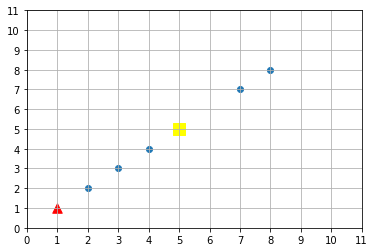

direction_bc E
ball_coordinates [4, 4]
[2, 3, 4, 7, 8]
[2, 3, 4, 7, 8]
W spychacz_way ([[1, 1], [2, 1], [3, 1], [4, 1], [5, 1], [5, 2], [5, 3], [5, 4]], 'RRRRUUU')
W ball_way ([[4, 4], [4, 5], [5, 5]], 'UR')
E spychacz_way ([[1, 1], [1, 2], [1, 3], [2, 3], [2, 4], [3, 4]], 'UURUR')
E ball_way ([[4, 4], [5, 4], [5, 5]], 'RU')
N spychacz_way ([[1, 1], [2, 1], [3, 1], [4, 1], [4, 2], [4, 3]], 'RRRUU')
N ball_way ([[4, 4], [5, 4], [5, 5]], 'RU')
S spychacz_way ([[1, 1], [1, 2], [1, 3], [2, 3], [2, 4], [3, 4], [3, 5], [4, 5]], 'UURURUR')
S ball_way ([[4, 4], [5, 4], [5, 5]], 'RU')
spychacz_position E {'spychacz_way': [[1, 1], [1, 2], [1, 3], [2, 3], [2, 4], [3, 4]], 'ball_way': [[4, 4], [5, 4], [5, 5]]}


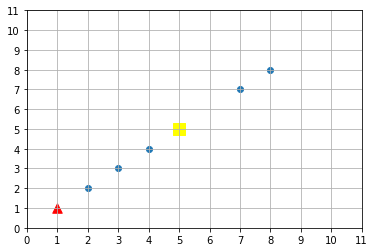

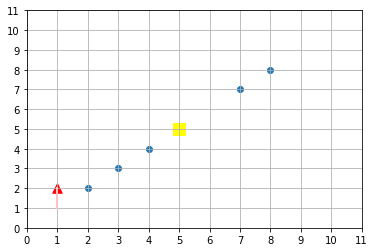

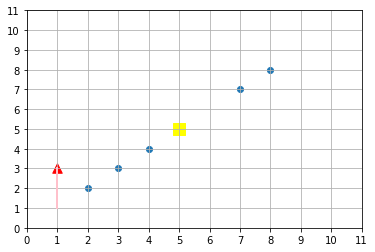

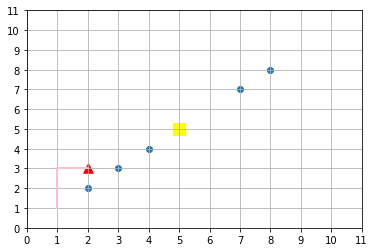

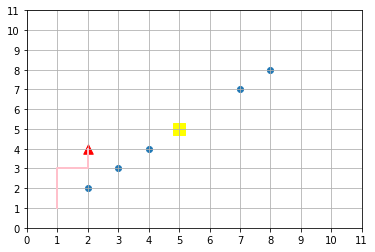

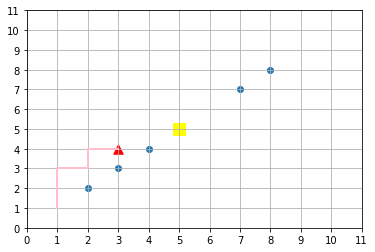

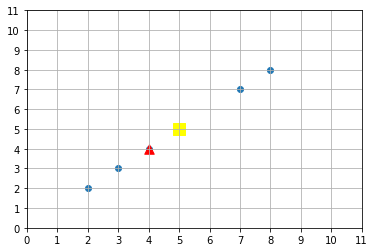

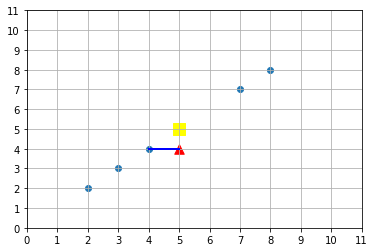

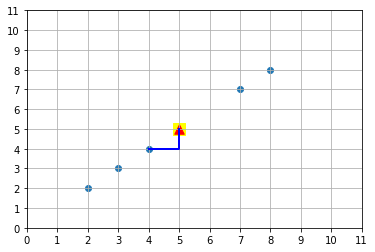

 Ball in the hall, do bunch of staff


In [63]:
import random
import time
import math

import matplotlib.pyplot as plt

def find_neighbours(next_node,height, obstacles_coordinates):
    neighbours_nodes = []
    neighbours = []

    for i in ["left", "right", "up", "down"]:
        if next_node[0] - 1 >= 1: # to not to move bole to the walls we use 1 instead of 0
            left = [next_node[0]  - 1, next_node[1]]
            if left not in obstacles_coordinates:
                neighbours.append("L")
                neighbours_nodes.append(left)
        if next_node[0] + 1 < height - 1: # to not to move bole to the walls we - 1
            right = [next_node[0]  + 1, next_node[1]]
            if right not in obstacles_coordinates:
                neighbours.append("R")
                neighbours_nodes.append(right)
        if next_node[1] + 1 < height  - 1: # to not to move bole to the walls we - 1
            down = [next_node[0], next_node[1] + 1]
            if down not in obstacles_coordinates:
                neighbours.append("U")
                neighbours_nodes.append(down)
        if next_node[1] - 1 >= 0: # axis x in [y,x] to [x, y]
            up = [next_node[0], next_node[1]  - 1]
            if up not in obstacles_coordinates:
                neighbours.append("D")
                neighbours_nodes.append(up)

        return neighbours_nodes, neighbours
        

def find_shortest_bfs(start_node,end_node, obstacles_coordinates, height):
    '''
    returns path inclueding start node and and node 
    '''
    visited = []
    queue_nodes = [[start_node]]
    queue_direcion = [[""]]

    while queue_nodes:
        current_way = queue_nodes.pop(0)
        next_node = current_way[-1]

        current_way_str = queue_direcion.pop(0)

        if next_node not in visited:
            neighbours_nodes, neighbours = find_neighbours(next_node, height, obstacles_coordinates)
            for index, neighbour in enumerate(neighbours_nodes):
                new_way = list(current_way)
                new_way.append(neighbour)
                new_way_str = list(current_way_str)
                new_way_str.append(neighbours[index])
                queue_nodes.append(new_way)
                queue_direcion.append(new_way_str)

                if neighbour == end_node:
                    new_way_str.pop(0)
                    direction = "".join(new_way_str)
                    return new_way, direction
        visited.append(next_node)

    return [], ''







class Spychacz:
    def __init__(self,x,y,a):
        self.x = x
        self.y = y
        self.symbole = { 0: '^', 90: '>', 180: "v", 270: '<'}
        self.a = 0
        self.symbol = self.symbole[a]
        self.sx = [self.x]
        self.sy = [self.y]
        self.symbols_history = [self.symbol]
        
        
        
        

class Mapa:
    def __init__(self):
        self.number_of_balls = 5
        self.size_grid = 10
        self.container_x = int(self.size_grid/2)
        self.container_y = int(self.size_grid/2)
        
#         self.balls_x = [random.randrange(2, self.size_grid - 2) for x in range(self.number_of_balls)]
#         self.balls_y = [random.randrange(2, self.size_grid - 2) for y in range(self.number_of_balls)]
        
        self.balls_x = [2, 3, 4, 7, 8]
        self.balls_y = [2, 3, 4, 7, 8]


        self.balls_coordinates = self.get_balls_coordinates()
        self.spychacz = Spychacz(1,1,0)
          
        self.draw_map()
        
        self.obstacles = []
        self.target_index = self.container_closest_point()
        
        
    def container_closest_point(self):
        '''
        closest point to container
        assigns a ball ID to self.target_index
        and returns
        '''
        minimum = self.size_grid * 100000
        x1, y1 = self.container_x, self.container_y
        for i, b in enumerate(self.get_balls_coordinates()):
            x2, y2 = b[0], b[1]
            distance = math.sqrt(((x2 -x1)**2) + ((y2 -y1)**2))
            if minimum > distance:
                minimum = distance
                self.target_index = i
        return self.target_index
             
      
    def get_balls_coordinates(self):
        return list(map(list, zip(self.balls_x, self.balls_y)))
    
    
    def check_directions(self, p1, p2):
        '''
        checks where is a poin2 for a given point1 N, NE, E, SE, S, SW, W, NW and returns N, E, S & W only
        returns direction string and deduction of x or y ?????
        '''
        x, y = p2[0]-p1[0], p2[1]-p1[1]
        # angle 0        x = 0 and y > 0    N
        if x == 0 and y > 0:
            return 'N'
        # angles 1 - 89  x > 0 and y > 0    NE
        elif x > 0 and y > 0: 
            if math.degrees(math.atan(y/x)) > 45: 
                return 'N'
            return 'E'
        # angle 90    y = 0 and x > 0      E
        elif y == 0 and x > 0:
            return 'E'
        # angles 91 - 179 x > 0 and y < 0  SE
        elif x > 0 and y < 0:
            
            if math.degrees(math.atan((y * -1)/x)) > 45:
                return 'S'
            return 'E'
        # angle 180   x = 0 and y < 0      S
        elif x == 0 and y < 0:
            return 'S'
        # angles 181 - 269 x  < 0 and y < 0 SW
        elif x  < 0 and y < 0:
            if math.degrees(math.atan((y*-1)/(x*-1))) > 45:
                return 'S'
            return 'W'
        # angle 270   y = 0 and x < 0     W
        elif y == 0 and x < 0:
            return 'W'
        # angles 271 - 359 x < 0 and y > 0 NW
        elif x < 0 and y > 0:
            if math.degrees(math.atan(y/(x*-1))) > 45:
                return 'N'
            return 'W'
        
    def which_way(self):
        obstacles = list(self.get_balls_coordinates())
        obstacles.pop(mapa.target_index)
        ball_coordinates = self.balls_coordinates[self.target_index]
        container_coordinates = [self.container_x, self.container_y]
        spychacz_coordinates = [self.spychacz.x, self.spychacz.y]
    
        print('ball_coordinates', ball_coordinates)

        print(self.balls_x)
        print(self.balls_y)
         
        target = {}
        for i in ["W", "E", "N", "S"]:
            if i == "W":
                left = [ball_coordinates[0] + 1, ball_coordinates[1]]  
                # if spychacz can go there
                obstacles_for_spychacz = list(obstacles) + [ ball_coordinates]
                spychacz_way = find_shortest_bfs(spychacz_coordinates, left, obstacles_for_spychacz, self.size_grid)
                print( "W", 'spychacz_way', spychacz_way)
                # if ball gets to the hall
                obstacles_for_ball = list(obstacles) + [ left]
                ball_way = find_shortest_bfs(ball_coordinates, container_coordinates, obstacles_for_ball, self.size_grid)
                print( "W", 'ball_way', ball_way)
                if spychacz_way and ball_way: 
                    target["W"] = {'spychacz_way': spychacz_way[0], 'ball_way': ball_way[0]}
            if i == "E":
                right = [ball_coordinates[0] - 1, ball_coordinates[1]]
                obstacles_for_spychacz = list(obstacles) + [ ball_coordinates]
                spychacz_way = find_shortest_bfs(spychacz_coordinates, right, obstacles_for_spychacz, self.size_grid)
                print( "E", 'spychacz_way', spychacz_way)
                obstacles_for_ball = list(obstacles) + [ right]
                ball_way = find_shortest_bfs(ball_coordinates, container_coordinates, obstacles_for_ball, self.size_grid)
                print( "E", 'ball_way', ball_way)
                if spychacz_way and ball_way: 
                    target["E"] = {'spychacz_way': spychacz_way[0], 'ball_way': ball_way[0]}
            if i == "N":
                up = [ball_coordinates[0], ball_coordinates[1] - 1]
                obstacles_for_spychacz = list(obstacles) + [ ball_coordinates]
                spychacz_way = find_shortest_bfs(spychacz_coordinates, up, obstacles_for_spychacz, self.size_grid)
                print( "N", 'spychacz_way', spychacz_way)
                obstacles_for_ball = list(obstacles) + [up]
                ball_way = find_shortest_bfs(ball_coordinates, container_coordinates, obstacles_for_ball, self.size_grid)
                print( "N", 'ball_way', ball_way)
                if spychacz_way and ball_way: 
                    target["N"] = {'spychacz_way': spychacz_way[0], 'ball_way': ball_way[0]}
            if i == "S":
                down = [ball_coordinates[0], ball_coordinates[1] + 1]
                obstacles_for_spychacz = list(obstacles) + [ ball_coordinates]
                spychacz_way = find_shortest_bfs(spychacz_coordinates, down, obstacles_for_spychacz, self.size_grid)
                print( "S", 'spychacz_way', spychacz_way)
                obstacles_for_ball = list(obstacles) + [down]
                ball_way = find_shortest_bfs(ball_coordinates, container_coordinates, obstacles_for_ball, self.size_grid)
                print( "S", 'ball_way', ball_way)
                if spychacz_way and ball_way: 
                    target["S"] = {'spychacz_way': spychacz_way[0], 'ball_way': ball_way[0]}
        return target
    
    def draw_map(self):
        plt.scatter(self.balls_x, self.balls_y)
        plt.scatter(self.container_x, self.container_y, color='yellow', s= 130, marker="s")
        plt.plot(self.spychacz.sx, self.spychacz.sy, color='pink', linewidth='2')
        plt.scatter(self.spychacz.x, self.spychacz.y, marker=self.spychacz.symbol, c='r', s= 90)
        plt.xticks(list(range(self.size_grid + 2)))
        plt.yticks(list(range(self.size_grid + 2)))
        plt.grid()
        plt.show()
        
    def temp_drawing(self, nodes, color):
        sx, sy = list(), list()
        for i, v in enumerate(nodes):
            sx.append(v[0])
            sy.append(v[1])
            self.spychacz.x, self.spychacz.y = v[0], v[1]
            plt.scatter(self.balls_x, self.balls_y)
            plt.scatter(self.container_x, self.container_y, color='yellow', s= 130, marker="s")
            plt.plot(sx, sy, color=color, linewidth='2')
            plt.scatter(self.spychacz.x, self.spychacz.y, marker=self.spychacz.symbol, c='r', s= 90)
            plt.xticks(list(range(self.size_grid + 2)))
            plt.yticks(list(range(self.size_grid + 2)))
            plt.grid()
            plt.show()
    
    def shortest_way_target(self, target):
        for k in sorted(target, key=lambda k: len(target[k]['ball_way']), reverse=False):
            return k
    
    def move_to_ball(self):
        ball_coordinates = self.balls_coordinates[self.target_index]
        container_coordinates = [self.container_x, self.container_y]
        spychacz_coordinates = [self.spychacz.x, self.spychacz.y]
        
        direction_bc = self.check_directions(ball_coordinates, container_coordinates)
        direction_sc = self.check_directions(spychacz_coordinates, container_coordinates)
        
        print('direction_bc', direction_bc)

        target = self.which_way()
        spychacz_position = None
        if target != {}: #  if there is a way
            if direction_bc == 'N' and 'N' in list(target.keys()):
                spychacz_position = 'N'
            if direction_bc == 'N' and 'N' not in list(target.keys()):
                # take shortes:
                spychacz_position = self.shortest_way_target(target)
            if direction_bc == 'S' and 'S' in list(target.keys()):
                spychacz_position = 'S'
            if direction_bc == 'S' and 'S' not in list(target.keys()):
                # take shortes:
                spychacz_position = self.shortest_way_target(target)
            if direction_bc == 'E' and 'E' in list(target.keys()):
                spychacz_position = 'E'
            if direction_bc == 'E' and 'E' not in list(target.keys()):
                # take shortes:
                spychacz_position = self.shortest_way_target(target)
            if direction_bc == 'W' and 'W' in list(target.keys()):
                spychacz_position = 'W'
            if direction_bc == 'W' and 'W' not in list(target.keys()):
                # take shortes:
                spychacz_position = self.shortest_way_target(target)
            
            print('spychacz_position', spychacz_position, target[spychacz_position])
                
            self.temp_drawing (target[spychacz_position]['spychacz_way'], 'pink')    
            self.temp_drawing (target[spychacz_position]['ball_way'], 'blue')  
            
            
            print (' Ball in the hall, do bunch of staff')
            
        else: # there is no away
            pass
            

            
            
                    
    

# find_shortest_bfs(start_node,end_node, obstacles_coordinates, height)           
mapa = Mapa()
mapa.move_to_ball()